In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
salary = pd.read_csv('Position_Salaries.csv')

In [3]:
salary.head()

,Unnamed: 0,Position,Level,Salary
0,0,Business Analyst,1,45000
1,1,Junior Consultant,2,50000
2,2,Senior Consultant,3,60000
3,3,Manager,4,80000
4,4,Country Manager,5,110000


In [5]:
salary.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
salary

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
x = salary.iloc[:, 1:2].values
y = salary.iloc[:,2].values

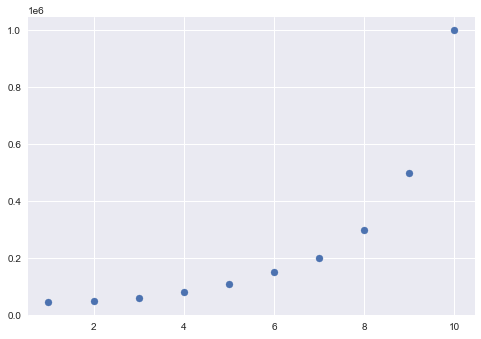

In [8]:
plt.scatter(x,y)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lR = LinearRegression()

In [11]:
#modeling
lR.fit(x,y)

LinearRegression()

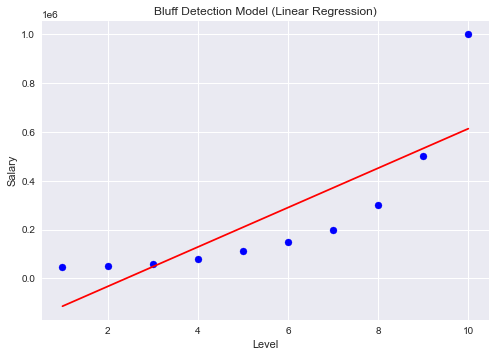

In [12]:
#visualisasi
plt.scatter(x, y, color='blue')
plt.plot(x, lR.predict(x), color='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Bluff Detection Model (Linear Regression)')
plt.show()

In [14]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [20]:
rdg = Ridge(alpha=100.0)
ls = Lasso(alpha=100.0)

In [21]:
#modeling
rdg.fit(x,y)
ls.fit(x,y)

Lasso(alpha=100.0)

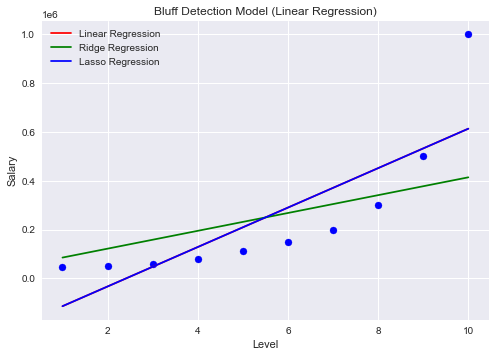

In [22]:
#visualisasi
plt.scatter(x, y, color='blue')
plt.plot(x, lR.predict(x), color='red', label='Linear Regression')
plt.plot(x, rdg.predict(x), color='green', label='Ridge Regression')
plt.plot(x, ls.predict(x), color='blue', label='Lasso Regression')
plt.legend()
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Bluff Detection Model (Linear Regression)')
plt.show()

In [23]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly_regs = PolynomialFeatures(degree=2)

In [37]:
x_poly = poly_regs.fit_transform(x)

In [38]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [39]:
lR2 = LinearRegression()
lR2.fit(x_poly, y)

LinearRegression()

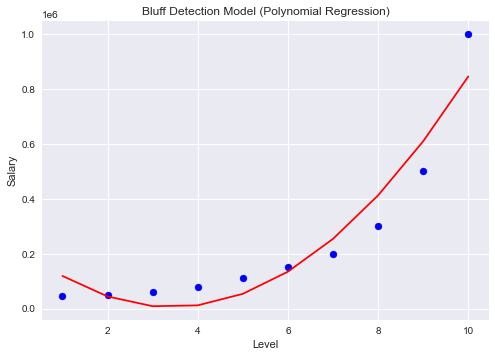

In [41]:
#visualisasi
plt.scatter(x, y, color='blue')
plt.plot(x, lR2.predict(x_poly), color='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Bluff Detection Model (Polynomial Regression)')
plt.show()

In [42]:
lR.coef_

array([80878.78787879])

In [43]:
lR.intercept_

-195333.33333333337

In [46]:
#model matematika dari linear regression
print('y = {} x + {}'.format(lR.coef_, lR.intercept_))

y = [80878.78787879] x + -195333.33333333337


### Model yang bisa digunakan untuk Problem Regresi
- Linear Regression (include regularization, polynomial regresi)
- Decision Tree Regresor
- Random Forest Regresor
- Xgboost Regresor

In [47]:
df_fish = pd.read_csv('Fish.csv')

In [48]:
df_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [50]:
df_fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [52]:
df_fish = pd.get_dummies(df_fish, columns=['Species'], prefix='spc')

In [53]:
df_fish.head()

,Weight,Length1,Length2,Length3,Height,Width,spc_Bream,spc_Parkki,spc_Perch,spc_Pike,spc_Roach,spc_Smelt,spc_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [54]:
#train test split
from sklearn.model_selection import train_test_split

In [55]:
X = df_fish.drop('Weight', axis=1)
y = df_fish['Weight']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [60]:
X_test.shape

(32, 12)

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
DTR = DecisionTreeRegressor()

In [63]:
#modeling
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
y_pred = DTR.predict(X_test)

In [65]:
#Evaluasi
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [68]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [69]:
print('R-squared :', r2)
print('RMSE :', rmse)
print('MAE', mae)

R-squared : 0.972988058535251
RMSE : 59.57484525787709
MAE 45.265625


### Latihan

In [113]:
insurance = pd.read_csv('insurance.csv')

In [114]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [115]:
y = insurance['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [116]:
insurance.drop('charges', axis=1, inplace=True)

In [117]:
X = insurance

In [118]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [129]:
# Label Encode
from sklearn.preprocessing import LabelEncoder
lE = LabelEncoder()

In [131]:
# encode sex, smoker
insurance['sex'] = lE.fit_transform(insurance['sex'])
insurance['smoker'] = lE.fit_transform(insurance['smoker'])

In [132]:
insurance = pd.get_dummies(insurance, columns=['region'], prefix='reg')

In [134]:
X = insurance

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [136]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [137]:
y_pred = DTR.predict(X_test)

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
RFG = RandomForestRegressor()

In [141]:
#modeling
RFG.fit(X_train, y_train)

RandomForestRegressor()

In [142]:
y_pred = RFG.predict(X_test)

In [143]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [144]:
print('R-squared :', r2)
print('RMSE :', rmse)
print('MAE', mae)

R-squared : 0.8091065583891652
RMSE : 4632.59398954765
MAE 2476.1335430781596
